# Explore here

In [26]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
from scipy.stats import linregress



# Load the .env file variables
load_dotenv()

# Retrieve environment variables correctly
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")


spotify = spotipy.Spotify(
    client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
)

#This will find the albums for The Strokes
strokes_uri = 'spotify:artist:0epOFNiUfyON9EYx7Tpr6V'

results = spotify.artist_albums(strokes_uri, album_type='album')
albums = results['items']

while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])


for album in albums:
    print(album['name'])

The Singles - Volume 01
The New Abnormal
Comedown Machine
Angles
First Impressions Of Earth
Room On Fire
Is This It


In [2]:
#Now I want to get the top 10 songs from The Strokes

strokes_uri = 'spotify:artist:0epOFNiUfyON9EYx7Tpr6V'

top_tracks = spotify.artist_top_tracks(strokes_uri)
tracks = results['items']

print(f"{'No.':<4} {'Track Name':<40} {'Popularity':<10} {'Duration (min:sec)'}")
print("=" * 70)

track_data = []
for track in top_tracks['tracks']:
    track_data.append({
        'Track Name': track['name'],
        'Popularity (out of 100)': track['popularity'],
        'Duration (min:sec)': f"{track['duration_ms'] // 60000}:{(track['duration_ms'] % 60000) // 1000:02d}"
    })


df = pd.DataFrame(track_data)
print(df)



No.  Track Name                               Popularity Duration (min:sec)
                    Track Name  Popularity (out of 100) Duration (min:sec)
0       The Adults Are Talking                       77               5:09
1                     Reptilia                       77               3:39
2                      Someday                       69               3:03
3                    Last Nite                       65               3:13
4           You Only Live Once                       69               3:09
5  Call It Fate, Call It Karma                       68               3:24
6                     Selfless                       67               3:42
7              Ode To The Mets                       66               5:51
8              Hard To Explain                       56               3:44
9      Under Cover of Darkness                       63               3:55



(instructions)
Since the result obtained in these steps is likely to be in table format, convert it to a 
DataFrame by importing the data in its dictionary format. Next, sort the songs by increasing popularity and display the resulting top 3.

In [22]:
#This will fetch the top three songs by the strokes in terms of popularity
df_sorted =df.sort_values(by = 'Popularity (out of 100)', ascending=False)

print(df_sorted[:3])



               Track Name  Popularity (out of 100)  Duration (min)
0  The Adults Are Talking                       77            5.15
1                Reptilia                       77            3.65
2                 Someday                       69            3.05


In [23]:
print(df)

#Before analysis, I want to get the minutes into their full time in minutes

def convert_to_minute(time_str):
    minutes, sec = map(int, time_str.split(":"))
    return minutes + (sec/60)

df["Duration (min:sec)"] =df["Duration (min:sec)"].apply(convert_to_minute)
print(df[["Duration (min:sec)"]])



                    Track Name  Popularity (out of 100)  Duration (min)
0       The Adults Are Talking                       77        5.150000
1                     Reptilia                       77        3.650000
2                      Someday                       69        3.050000
3                    Last Nite                       65        3.216667
4           You Only Live Once                       69        3.150000
5  Call It Fate, Call It Karma                       68        3.400000
6                     Selfless                       67        3.700000
7              Ode To The Mets                       66        5.850000
8              Hard To Explain                       56        3.733333
9      Under Cover of Darkness                       63        3.916667


KeyError: 'Duration (min:sec)'

In [25]:
#Renaming the column with time to show how it's presented now
df.rename(columns={"Duration (min:sec)": "Duration (min)"}, inplace=True)
print(df)

                    Track Name  Popularity (out of 100)  Duration (min)
0       The Adults Are Talking                       77        5.150000
1                     Reptilia                       77        3.650000
2                      Someday                       69        3.050000
3                    Last Nite                       65        3.216667
4           You Only Live Once                       69        3.150000
5  Call It Fate, Call It Karma                       68        3.400000
6                     Selfless                       67        3.700000
7              Ode To The Mets                       66        5.850000
8              Hard To Explain                       56        3.733333
9      Under Cover of Darkness                       63        3.916667


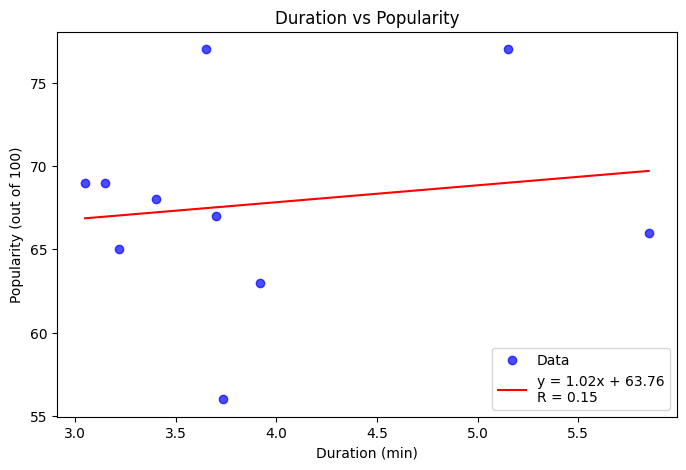

R-value: 0.1495


In [30]:
#Going to analyze the data with Duration on the x-axis and Popularity on the y-axis. Then do a linear regression to see if the relationship is signifcant

plt.figure(figsize=(8,5))
plt.scatter(df["Duration (min)"], df["Popularity (out of 100)"], alpha=.7, label="Data", color="blue")

slope, intercept, r_value, p_value, std_err = linregress(df["Duration (min)"], df["Popularity (out of 100)"])
x_vals = np.linspace(df["Duration (min)"].min(), df["Duration (min)"].max(), 100)
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}")


plt.xlabel("Duration (min)")
plt.ylabel("Popularity (out of 100)")
plt.title("Duration vs Popularity")
plt.legend()
plt.show()


# Print R-value
print(f"R-value: {r_value:.4f}")



#### I also would like to do a graph zoomed out

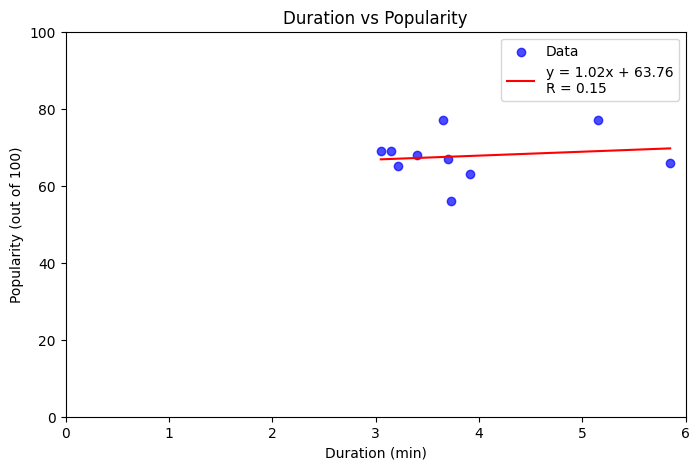

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(df["Duration (min)"], df["Popularity (out of 100)"], alpha=.7, label="Data", color="blue")

slope, intercept, r_value, p_value, std_err = linregress(df["Duration (min)"], df["Popularity (out of 100)"])
x_vals = np.linspace(df["Duration (min)"].min(), df["Duration (min)"].max(), 100)
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}")


plt.xlabel("Duration (min)")
plt.ylabel("Popularity (out of 100)")
plt.title("Duration vs Popularity")
plt.xlim(0,6)
plt.ylim(0,100)
plt.legend()
plt.show()

#### As we can see in the scatter plot and by the r value, there is a weak (positive) connection between duration and popularity